In [19]:
!pip install pandas numpy matplotlib scikit-learn 

Defaulting to user installation because normal site-packages is not writeable


In [21]:
!pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable


In [23]:
import pandas as pd

# Use one of these paths (I recommend Solution 1):
df = pd.read_excel(r"C:\Users\sshre\OneDrive\Desktop\Churn analysis Project\churn.xlsx")

# Display the data
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [27]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the results
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [31]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Print the result
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [33]:
# Check current data types
print("Current Data Types:")
print(df.dtypes)

# Convert 'Geography' and 'Gender' to categorical (optional but memory-efficient)
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')

# Check binary columns (e.g., 'HasCrCard', 'IsActiveMember', 'Exited')
# Ensure they are integers (0/1)
print("\nBinary Columns:")
print(df[['HasCrCard', 'IsActiveMember', 'Exited']].sample(5))

# Verify numerical columns (e.g., 'CreditScore', 'Age')
print("\nNumerical Columns Summary:")
print(df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].describe())

Current Data Types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Binary Columns:
      HasCrCard  IsActiveMember  Exited
5808          1               0       1
5144          1               1       0
8752          1               0       0
8194          1               0       0
5284          1               1       0

Numerical Columns Summary:
        CreditScore           Age        Balance  EstimatedSalary
count  10000.000000  10000.000000   10000.000000     10000.000000
mean     650.528800     38.921800   76485.889288    100090.239881
std       96.653299     10.487806   62397.405202     57510.492818
min      350.000000     18.000000      

In [35]:
# Convert 'Geography' and 'Gender' to categorical 
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')

# Check the updated data types
print("\nUpdated Data Types:")
print(df.dtypes)


Updated Data Types:
RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object


In [37]:
# Drop irrelevant columns
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Check the updated dataset
print(df.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Split data FIRST to avoid leakage
X = df.drop('Exited', axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numerical_cols = ['CreditScore', 'Age', 'Balance', 'Tenure', 'NumOfProducts', 'EstimatedSalary']
categorical_cols = ['Geography', 'Gender']

# Use ColumnTransformer to apply scaler and encoder together
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Fit on training data and transform both sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert back to DataFrames with column names (optional but helpful)
# Get feature names after OneHotEncoding
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = numerical_cols + list(cat_features)

X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=all_features)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=all_features)

# Check the preprocessed data
print(X_train_preprocessed.head())


   CreditScore       Age   Balance    Tenure  NumOfProducts  EstimatedSalary  \
0     0.356500 -0.655786 -1.218471  0.345680       0.808436         1.367670   
1    -0.203898  0.294938  0.696838 -0.348369       0.808436         1.661254   
2    -0.961472 -1.416365  0.618629 -0.695393      -0.916688        -0.252807   
3    -0.940717 -1.131148  0.953212  1.386753      -0.916688         0.915393   
4    -1.397337  1.625953  1.057449  1.386753      -0.916688        -1.059600   

   Geography_Germany  Geography_Spain  Gender_Male  
0                0.0              0.0          1.0  
1                1.0              0.0          1.0  
2                0.0              1.0          1.0  
3                0.0              0.0          0.0  
4                0.0              0.0          1.0  


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_preprocessed, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_preprocessed)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8035

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.50      0.14      0.22       393

    accuracy                           0.80      2000
   macro avg       0.66      0.55      0.55      2000
weighted avg       0.76      0.80      0.76      2000


Confusion Matrix:
[[1552   55]
 [ 338   55]]


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest with class_weight
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
rf_model.fit(X_train_preprocessed, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_preprocessed)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.855

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1       0.71      0.44      0.54       393

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000


Confusion Matrix:
[[1538   69]
 [ 221  172]]


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Updated parameter grid with max_features and safer class_weight options
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'max_features': ['sqrt', 'log2', None],  # Added for feature randomization
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced'],  # Safer (remove 'balanced_subsample' if bootstrap=False)
    'bootstrap': [True, False]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search with recall scoring
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid, 
    n_iter=50,  # Increased iterations
    scoring='recall',  # Focus on minimizing false negatives
    cv=5,
    verbose=2, 
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search.fit(X_train_preprocessed, y_train)

# Best parameters and evaluation (same as before)
best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test_preprocessed)

print("Best Parameters:", random_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'class_weight': 'balanced', 'bootstrap': False}

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84      1607
           1       0.43      0.73      0.55       393

    accuracy                           0.76      2000
   macro avg       0.68      0.75      0.69      2000
weighted avg       0.83      0.76      0.78      2000



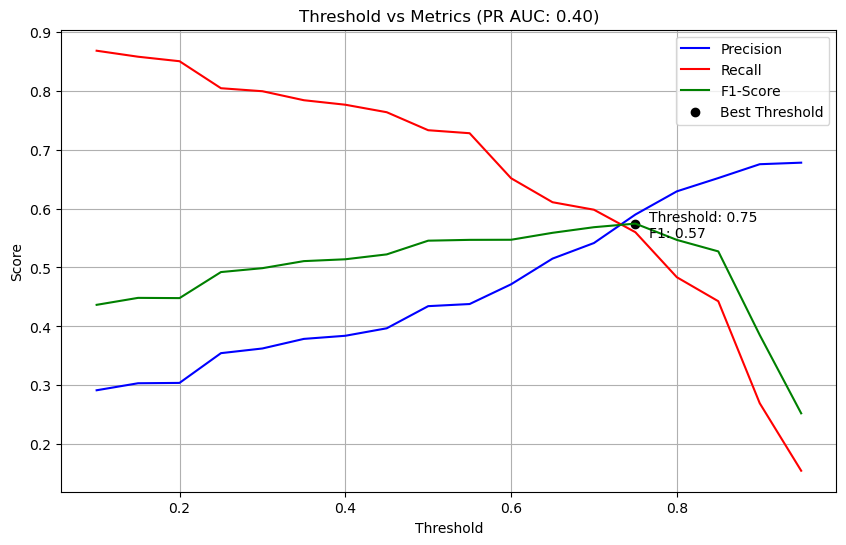


Best Threshold: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1607
           1       0.59      0.56      0.57       393

    accuracy                           0.84      2000
   macro avg       0.74      0.73      0.74      2000
weighted avg       0.83      0.84      0.84      2000


Confusion Matrix:
[[1454  153]
 [ 173  220]]


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, auc
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Get predicted probabilities for class 1
y_pred_proba = best_rf.predict_proba(X_test_preprocessed)[:, 1]

# Test thresholds from 0.1 to 0.9 in steps of 0.05
thresholds = np.arange(0.1, 1.0, 0.05)
best_threshold = 0.5
best_f1 = 0
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    
    # Calculate metrics directly
    precision = precision_score(y_test, y_pred_threshold, pos_label=1)
    recall = recall_score(y_test, y_pred_threshold, pos_label=1)
    f1 = f1_score(y_test, y_pred_threshold, pos_label=1)
    
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision", color="blue")
plt.plot(thresholds, recalls, label="Recall", color="red")
plt.plot(thresholds, f1_scores, label="F1-Score", color="green")
plt.scatter(best_threshold, best_f1, color='black', marker='o', label='Best Threshold')
plt.annotate(f'Threshold: {best_threshold:.2f}\nF1: {best_f1:.2f}', 
             (best_threshold, best_f1), 
             xytext=(10, -10), 
             textcoords='offset points')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title(f"Threshold vs Metrics (PR AUC: {auc(recalls, precisions):.2f})")
plt.legend()
plt.grid(True)
plt.show()

# Final evaluation
y_pred_best_threshold = (y_pred_proba >= best_threshold).astype(int)
print(f"\nBest Threshold: {best_threshold:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_threshold))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_threshold))

In [49]:
!pip install joblib


Defaulting to user installation because normal site-packages is not writeable


In [51]:
import joblib

# Save the trained model
joblib.dump(best_rf, 'random_forest_model.joblib')

# Save the preprocessor (if any preprocessing steps were done)
# Note: If you used a pipeline or transformer for preprocessing, save that as well
joblib.dump(preprocessor, 'preprocessor.joblib')

# Optionally, if you had a scaler (like StandardScaler, MinMaxScaler), save it:
# joblib.dump(scaler, 'scaler.joblib')

print("Model and preprocessor have been saved successfully.")


Model and preprocessor have been saved successfully.


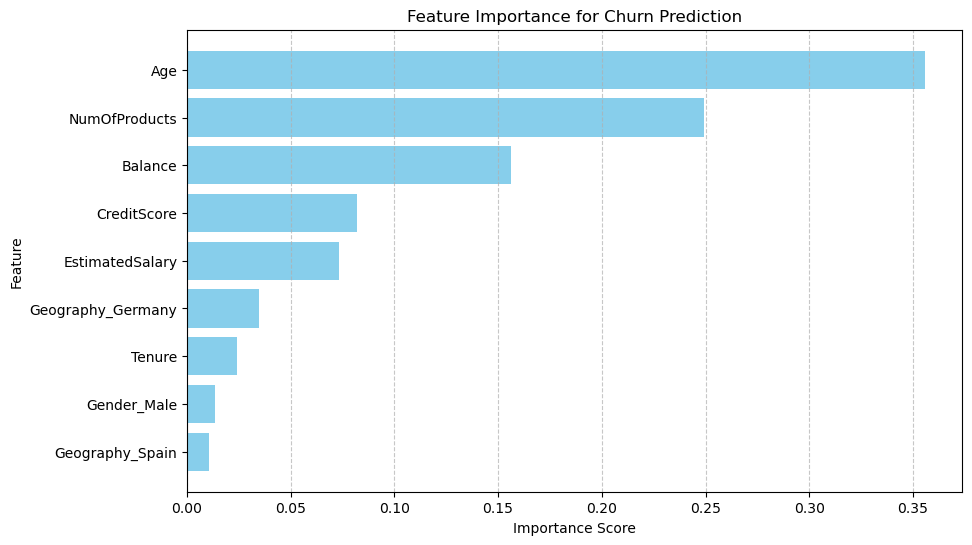

Feature Importances:
             Feature  Importance
1                Age    0.355891
4      NumOfProducts    0.249409
2            Balance    0.156275
0        CreditScore    0.081931
5    EstimatedSalary    0.073401
6  Geography_Germany    0.034587
3             Tenure    0.024260
8        Gender_Male    0.013482
7    Geography_Spain    0.010764


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the model is trained and feature importances are available
if hasattr(best_rf, 'feature_importances_'):
    # Get feature importances
    feature_importances = best_rf.feature_importances_

    # Create a DataFrame with feature names and their importance
    features_df = pd.DataFrame({
        'Feature': X_train_preprocessed.columns,  # Use preprocessed feature names
        'Importance': feature_importances
    })

    # Sort features by importance
    features_df = features_df.sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Churn Prediction')
    plt.gca().invert_yaxis()  # Most important feature at the top
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
    plt.show()

    # Print sorted feature importances
    print("Feature Importances:")
    print(features_df)
else:
    print("Error: The model does not have feature importances. Ensure it is a tree-based model.")

In [55]:
# Get top 5 features that contribute the most to the model
top_features = features_df.head(5)
print("\nTop 5 Features Contributing to Churn Prediction:")
print(top_features)


Top 5 Features Contributing to Churn Prediction:
           Feature  Importance
1              Age    0.355891
4    NumOfProducts    0.249409
2          Balance    0.156275
0      CreditScore    0.081931
5  EstimatedSalary    0.073401


Confusion Matrix:
[[1232  375]
 [ 105  288]]


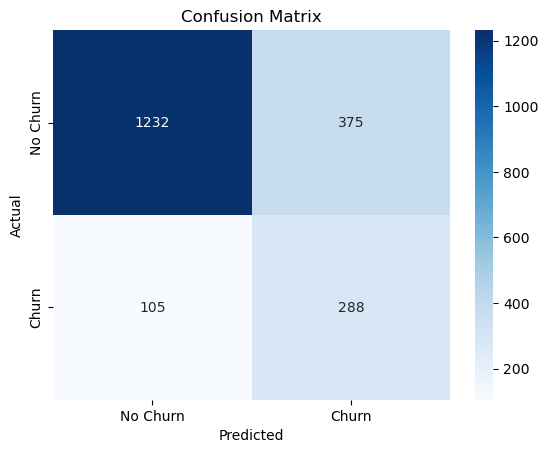

In [57]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred = best_rf.predict(X_test_preprocessed)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# Optionally, you can visualize the confusion matrix using Seaborn heatmap:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


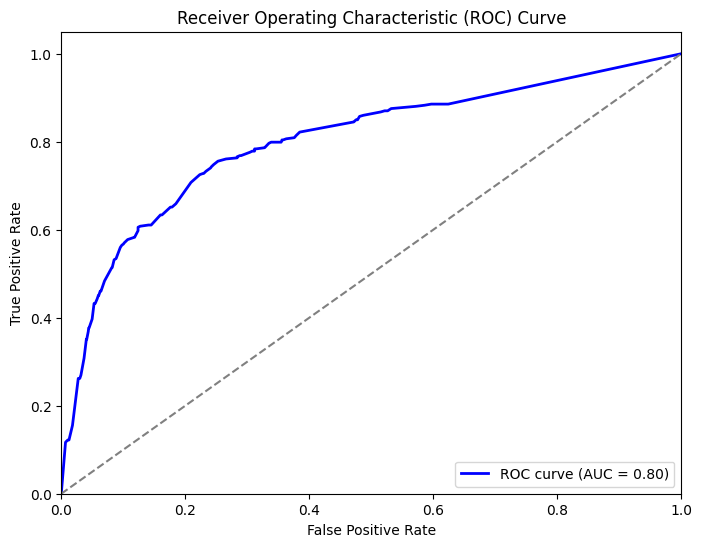

AUC Score: 0.80


In [19]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (churn = 1)
y_pred_proba = best_rf.predict_proba(X_test_preprocessed)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC Score: {roc_auc:.2f}")


In [59]:
import pandas as pd

# Create a DataFrame with only the required columns
predictions_df = pd.DataFrame({
    'Actual': y_test,  # Actual labels (0 or 1)
    'Predicted': y_pred_best,  # Predicted labels (0 or 1)
    'Predicted_Probability': y_pred_proba, # Predicted probabilities for class 1 (churn)
    'CreditScore': X_test['CreditScore'].values,  # Include CreditScore
    'Age': X_test['Age'].values,  # Include Age
    'Balance': X_test['Balance'].values,  # Include Balance
    'Geography': X_test['Geography'].values,  # Include Geography
    'Gender': X_test['Gender'].values,  # Include Gender
    'NumOfProducts': X_test['NumOfProducts'].values,  # Include NumOfProducts
    'IsActiveMember': X_test['IsActiveMember'].values  # Include IsActiveMember
})

# Save to CSV
predictions_df.to_csv('predictions.csv', index=False)

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    'Value': [accuracy, precision, recall, f1, roc_auc]
})

# Save to CSV
metrics_df.to_csv('model_metrics.csv', index=False)

In [67]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Convert to a DataFrame
confusion_matrix_df = pd.DataFrame(cm, 
                                   columns=['Predicted_No_Churn', 'Predicted_Churn'], 
                                   index=['Actual_No_Churn', 'Actual_Churn'])

# Save to CSV
confusion_matrix_df.to_csv('confusion_matrix.csv')

In [63]:
# Get feature importances from the best Random Forest model
feature_importances = best_rf.feature_importances_

# Create a DataFrame for feature importance
features_df = pd.DataFrame({
    'Feature': X_train_preprocessed.columns,  # Use preprocessed feature names
    'Importance': feature_importances
})

# Sort features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Save to CSV
features_df.to_csv('feature_importance.csv', index=False)

In [65]:
from sklearn.metrics import roc_curve

# Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Create a DataFrame for ROC curve data
roc_curve_df = pd.DataFrame({
    'False_Positive_Rate': fpr,
    'True_Positive_Rate': tpr,
    'Thresholds': thresholds
})

# Save to CSV
roc_curve_df.to_csv('roc_curve_data.csv', index=False)